In [1]:
# Breanna Powell and Melody Behdarvandian
# CSS 576
# Assignment 3

# IDE: Visual Studio Code 
# Follow these steps if you have not used Jupyter Notebooks in VS Code before:
# https://code.visualstudio.com/docs/languages/python

# -------------------------------------------------------------------------------------------------
#                    FOLLOW THESE STEPS TO INSTALL TENSORFLOW in VS CODE
# -------------------------------------------------------------------------------------------------
# Open Anaconda Navigator 
# Launch VS Code through Anaconda Navigator
# Terminal > New Terminal
#
# https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
# 1) Use the commands to create a tensorflow environment:
#    $ conda create -n tf tensorflow
#    $ conda activate tf
#
# https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_create-or-open-a-jupyter-notebook
# 2) In the upper right hand corner, switch the kernel from "base" over to "tf(Python 3.10.9)"
# This will change the kernel over to tensorflow's kernel.
#
# 3) Close this document and reopen it from Anaconda Navigator, but instead of "base" select "tf" from the dropdown menu
# If you don't see "tf" in the dropdown menu, try closing Anaconda Navigator and reopening it.
#
# 4) Install the following:
#    $ conda install ipykernel
#    $ conda install pandas matplotlib scikit-learn seaborn
#    $ conda install -c conda-forge tensorflow keras
# -------------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd

emailData = pd.read_csv('emails.csv')

## DATA EXPLORATION

In [2]:
emailData.shape # Check the size of the dataset

(5572, 5)

In [3]:
# Check to see if there are missing values (NaN or null)
emailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# PRE-PROCESSING TECHNIQUES

In [5]:
# Replace labels with 0 for ham and 1 for spam
emailData["label"] = (emailData["label"] == "spam").astype(int)

# Check to make sure it worked
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Separate the features (x) from the labels (y)
x = emailData['email']
y = emailData["label"]

In [7]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # LOOK FOR OTHER PARAMETERS TO USE
features = cv.fit_transform(x)
features.get_shape()

(5572, 8673)

In [8]:
# Imputing missing values with the most frequent value
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
from sklearn.impute import SimpleImputer
imputedEmails = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputedEmails.fit_transform(features)
imputedEmails.transform(features)

<5572x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 73917 stored elements in Compressed Sparse Column format>

In [9]:
# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Checking to make sure that there are no NaN's after using the imputer
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [12]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.001795,0.005205,0.000179,0.000359,0.000179,0.000179,0.000179,0.000359,0.000179,0.001436,...,0.002692,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.001615,0.000179,0.000179
std,0.042330,0.076788,0.013397,0.018944,0.013397,0.013397,0.013397,0.018944,0.013397,0.037867,...,0.055175,0.013397,0.013397,0.013397,0.013397,0.013397,0.013397,0.061375,0.013397,0.013397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [13]:
x.max()

0       1
1       2
2       1
3       1
4       1
       ..
8668    1
8669    1
8670    4
8671    1
8672    1
Length: 8673, dtype: int64

In [14]:


#x = x.drop(x.columns[1], 1)
#x.max()



In [15]:
maxIndex = len(x.columns)-1

for i in range(maxIndex,0,-1):
    
    if x[i].max() < 5.0:
        x = x.drop(x.columns[i], 1)

C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\1215290396.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(x.columns[i], 1)
C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\1215290396.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(x.columns[i], 1)
C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\1215290396.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(x.columns[i], 1)
C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\1215290396.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(x.columns[i], 1)
C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\1215290396.py:6: FutureWarning: In

In [16]:

x = x.drop(x.columns[0], 1)

C:\Users\vanco\AppData\Local\Temp\ipykernel_20688\878876571.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(x.columns[0], 1)


In [17]:
x.describe()

,1183,1438,1839,2458,2675,3090,3308,3663,3746,3830,...,5223,5367,6846,6897,6990,7627,7756,8051,8402,8609
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.088658,0.069454,0.084171,0.041098,0.073403,0.005384,0.126346,0.057071,0.019203,0.024049,...,0.136755,0.065865,0.017229,0.003410,0.008076,0.238335,0.402369,0.069095,0.069095,0.402010
std,0.322162,0.304375,0.327500,0.229564,0.329536,0.147886,0.389010,0.377012,0.243731,0.222087,...,0.483397,0.270233,0.149400,0.102854,0.128951,0.582687,0.721480,0.335319,0.312027,0.796408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,5.000000,11.000000,7.000000,6.000000,9.000000,10.000000,6.000000,18.000000,15.000000,10.000000,...,12.000000,5.000000,5.000000,5.000000,5.000000,10.000000,8.000000,6.000000,12.000000,14.000000


# Feature Reduction

In [18]:
#Substract the mean
x = x-x.mean()
x = x-x.std()


In [19]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

In [20]:
diagonalMatrix = np.diag(eigenvalues)

In [21]:
newMatrix = np.dot(zVar, eigenvectors)

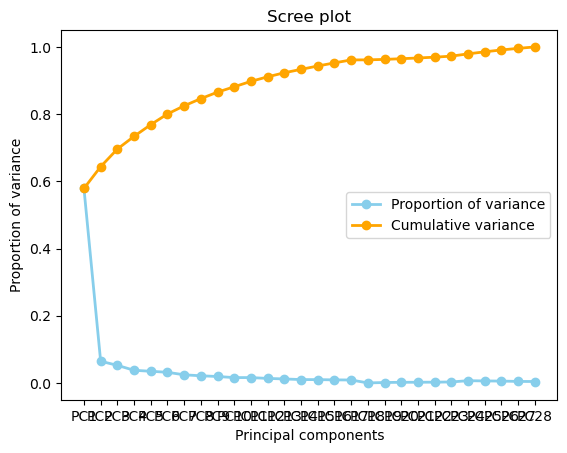

In [22]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [23]:
display(prop_var)

[0.5789018798037912,
 0.06468825023207517,
 0.05247905364247219,
 0.03778667349387542,
 0.03481826578731465,
 0.0317955315106076,
 0.024300374370821543,
 0.021403477423048965,
 0.019282995856513843,
 0.01600362444761512,
 0.016088008828715014,
 0.013540102225102726,
 0.012032139407573007,
 0.010113883147506659,
 0.00999409331009,
 0.009253834301533034,
 0.008867542474018168,
 0.00016033559278673523,
 0.0013700278185036084,
 0.0020451556676280122,
 0.0021703663747515106,
 0.002401939823483543,
 0.0030561225622634854,
 0.00679290229780114,
 0.006077146024381304,
 0.005618167981476057,
 0.004628824709841621,
 0.0043292808844086]

In [24]:
u, s, vh = np.linalg.svd(x, full_matrices=True)

In [25]:
nfeatures = len(x.columns);
nfeatures

28

In [26]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 
    

In [27]:
Vsquare

[[0.024736036487801528,
  0.022493789412294202,
  0.02473701724738703,
  0.011703300886486355,
  0.026053484980919306,
  0.004231225422751213,
  0.036297180702158476,
  0.03272857313921398,
  0.01241855519096241,
  0.011100406654507339,
  0.00823565476185219,
  0.019939738434575405,
  0.046581196150645696,
  0.05600405272536907,
  0.01188901592511798,
  0.03240673848521743,
  0.04207502958104663,
  0.0030949914736744574,
  0.05681837305126034,
  0.01475734577431506,
  0.004861995181717923,
  0.002033989733419137,
  0.003331102404931325,
  0.09318273592965394,
  0.1556806577876695,
  0.022431413899837348,
  0.02216944055970306,
  0.1980069580155116],
 [-0.013037222368073432,
  0.009088663433520057,
  0.001015989297583429,
  0.0019073334679517464,
  9.384160632557002e-05,
  0.001077770296495234,
  0.012326766344946291,
  0.04157421270526587,
  0.002625393455980635,
  0.006020430009264504,
  0.0015528511533008478,
  0.0035304532994783274,
  0.03264295217301029,
  0.012156083360547297,
  0

Text(0.5, 1.0, 'Loading Vector')

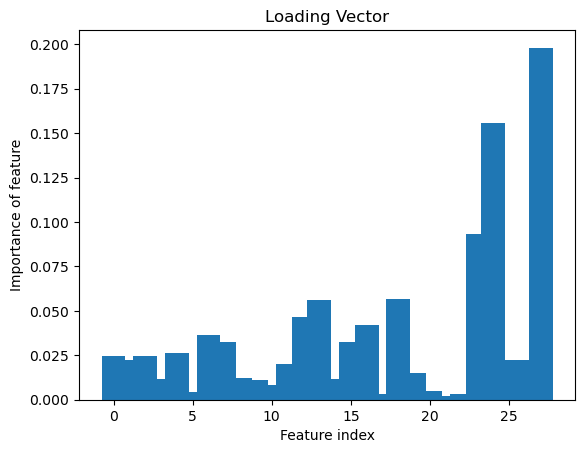

In [32]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel


bar(range(0,nfeatures), Vsquare[:][0], 1.5); 
    
grid; 
    
    
xlabel('Feature index')
    
ylabel('Importance of feature')
    

    
title("Loading Vector")

In [34]:
x.describe()

,1183,1438,1839,2458,2675,3090,3308,3663,3746,3830,...,5223,5367,6846,6897,6990,7627,7756,8051,8402,8609
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.322162,-0.304375,-0.327500,-0.229564,-0.329536,-0.147886,-0.389010,-0.377012,-0.243731,-0.222087,...,-0.483397,-0.270233,-0.149400,-0.102854,-0.128951,-0.582687,-0.721480,-0.335319,-0.312027,-0.796408
std,0.322162,0.304375,0.327500,0.229564,0.329536,0.147886,0.389010,0.377012,0.243731,0.222087,...,0.483397,0.270233,0.149400,0.102854,0.128951,0.582687,0.721480,0.335319,0.312027,0.796408
min,-0.410819,-0.373830,-0.411671,-0.270662,-0.402939,-0.153270,-0.515356,-0.434083,-0.262935,-0.246136,...,-0.620153,-0.336098,-0.166629,-0.106264,-0.137027,-0.821022,-1.123849,-0.404415,-0.381123,-1.198418
25%,-0.410819,-0.373830,-0.411671,-0.270662,-0.402939,-0.153270,-0.515356,-0.434083,-0.262935,-0.246136,...,-0.620153,-0.336098,-0.166629,-0.106264,-0.137027,-0.821022,-1.123849,-0.404415,-0.381123,-1.198418
50%,-0.410819,-0.373830,-0.411671,-0.270662,-0.402939,-0.153270,-0.515356,-0.434083,-0.262935,-0.246136,...,-0.620153,-0.336098,-0.166629,-0.106264,-0.137027,-0.821022,-1.123849,-0.404415,-0.381123,-1.198418
75%,-0.410819,-0.373830,-0.411671,-0.270662,-0.402939,-0.153270,-0.515356,-0.434083,-0.262935,-0.246136,...,-0.620153,-0.336098,-0.166629,-0.106264,-0.137027,-0.821022,-0.123849,-0.404415,-0.381123,-0.198418
max,4.589181,10.626170,6.588329,5.729338,8.597061,9.846730,5.484644,17.565917,14.737065,9.753864,...,11.379847,4.663902,4.833371,4.893736,4.862973,9.178978,6.876151,5.595585,11.618877,12.801582


# Split into Train and Test

In [ ]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape

In [ ]:
len(x_train)

In [ ]:
len(y_train)

# Neural Network

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 1 # - spam or ham
train_shape = x_train.shape
filter_size = 32 # Should be a power of 2

b = train_shape[1]
input_shape = (b,)

print(input_shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# https://keras.io/api/models/sequential/


# Activation function options:
# - relu
# - sigmoid - good for last layer of binary classification
# - elu - need to research this one

model = Sequential()
model.add(Dense(8, input_shape= input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

In [ ]:
# https://keras.io/api/callbacks/early_stopping/
# https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
# Monitor options:
#  - loss
#  - accuracy
#  - val_loss
#  - val_binary_crossentropy
# Mode options:
#  - min


callback = keras.callbacks.EarlyStopping(monitor='auc', patience=3) # stops if the accuracy gets high
# callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3) # monitors loss if the performance goes down

In [ ]:
model.summary() #This tells us what was in this network

In [ ]:
# https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
epochs = 50

In [ ]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam?
# - rmsprop?

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses  <---------- TO DO: LOOK THROUGH THESE
# Loss parameter options: 
# - binary_crossentropy # https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - accuracy
# - precision
# - recall

# TO DO: decide if we should use any optimizers (rmsprop, adam, sgd, adagrad, adadelta)

from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
model.compile(optimizer='sgd',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC(from_logits=True)])
model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score,recall_score

y_predict = model.predict(x_test)


# I wonder about this metric? -- it uses spam and ham in the example!
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss

# Visual

In [ ]:
# https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48

# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cf_matrix =confusion_matrix(y_test,y_predict)

# ax= plt.subplot()
# #annot=True to annotate cells
# sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# # labels, title and ticks
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels');
# ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);